### Select the Right Threshold values using ROC Curve

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [3]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [4]:
X.shape

(2000, 20)

In [5]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### Random Forests

In [8]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.981588888888889


In [9]:
ytrain_pred

array([[1.  , 0.  ],
       [0.99, 0.01],
       [0.01, 0.99],
       ...,
       [0.95, 0.05],
       [0.99, 0.01],
       [0.24, 0.76]])

#### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


#### Adaboost Classifier

In [11]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


#### KNNClassifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

KNN train roc-auc: 0.981670071491109
KNN test roc-auc: 0.9426111111111111


#### No we will focus on selecting the best threshold for maximum accuracy

In [13]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9848666666666667


In [30]:
pred[:2]

[0      0.99
 1      0.02
 2      0.91
 3      0.92
 4      0.64
        ... 
 595    0.01
 596    0.04
 597    0.99
 598    0.00
 599    0.99
 Length: 600, dtype: float64,
 0      0.991861
 1      0.000008
 2      0.966929
 3      0.761539
 4      0.779443
          ...   
 595    0.024239
 596    0.000003
 597    0.984385
 598    0.001147
 599    0.989540
 Length: 600, dtype: float64]

In [20]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.02,0.000008,0.463282,0.0
2,0.91,0.966929,0.538202,0.8
3,0.92,0.761539,0.509875,0.8
4,0.64,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.04,0.000003,0.441377,0.0
597,0.99,0.984385,0.532403,1.0
598,0.00,0.001147,0.441720,0.2


In [21]:
final_prediction

0      0.885262
1      0.120823
2      0.803783
3      0.747853
4      0.577447
         ...   
595    0.123840
596    0.120345
597    0.876697
598    0.160717
599    0.834857
Length: 600, dtype: float64

In [22]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.91156694, 0.91077475, 0.79380736,
       0.79162833, 0.78811406, 0.7880558 , 0.77387064, 0.77321156,
       0.77297605, 0.77287124, 0.72157482, 0.71887362, 0.6667442 ,
       0.66493537, 0.61116701, 0.61114346, 0.58406376, 0.58236186,
       0.58058969, 0.58050386, 0.57744674, 0.57675354, 0.55542732,
       0.55389283, 0.54345371, 0.53719563, 0.52615858, 0.49866892,
       0.4371034 , 0.36975652, 0.36879719, 0.35433098, 0.34086612,
       0.25073004, 0.24890421, 0.23448424, 0.23396893, 0.20102808,
       0.19848417, 0.11796807, 0.1178351 , 0.10498954])

In [23]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
30,0.437103,0.961667
27,0.537196,0.960000
25,0.553893,0.960000
29,0.498669,0.958333
28,0.526159,0.958333


In [24]:
accuracy_ls

,thresholds,accuracy
30,0.437103,0.961667
27,0.537196,0.960000
25,0.553893,0.960000
29,0.498669,0.958333
28,0.526159,0.958333
26,0.543454,0.958333
24,0.555427,0.958333
23,0.576754,0.956667
22,0.577447,0.955000
21,0.580504,0.955000


In [25]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

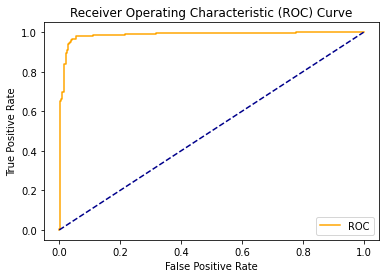

In [26]:
plot_roc_curve(fpr,tpr)